# Data Exploration on SW-620

SW-620_A.txt: Edge list (source-target node pairs)

SW-620_edge_labels.txt: Labels for each edge

SW-620_node_labels.txt: Labels for each node

SW-620_graph_indicator.txt: Indicates which graph each node belongs to

SW-620_graph_labels.txt: Labels for each graph (for classification)

SW-620_label_readme.txt: Describes label meanings

In [1]:
import os
# List files in the data directory containing the actual dataset
inner_dir = "data/SW-620/raw"
os.listdir(inner_dir)


['SW-620_A.txt',
 'SW-620_edge_labels.txt',
 'SW-620_graph_indicator.txt',
 'SW-620_graph_labels.txt',
 'SW-620_label_readme.txt',
 'SW-620_node_labels.txt']

Total graphs: 40,532

Total nodes: 1,056,253

Total edges: 2,276,774

Graph labels (target classes): [0, 1] → binary classification

Node labels: 65 unique types (from 0 to 64)

Edge labels: 3 types → [0, 1, 2]

In [2]:
import pandas as pd

# Load all files into DataFrames
edge_list = pd.read_csv(os.path.join(inner_dir, 'SW-620_A.txt'), header=None)
edge_labels = pd.read_csv(os.path.join(inner_dir, 'SW-620_edge_labels.txt'), header=None)
node_labels = pd.read_csv(os.path.join(inner_dir, 'SW-620_node_labels.txt'), header=None)
graph_indicator = pd.read_csv(os.path.join(inner_dir, 'SW-620_graph_indicator.txt'), header=None)
graph_labels = pd.read_csv(os.path.join(inner_dir, 'SW-620_graph_labels.txt'), header=None)

# Rename columns for clarity
edge_list.columns = ['source', 'target']
edge_labels.columns = ['edge_label']
node_labels.columns = ['node_label']
graph_indicator.columns = ['graph_id']
graph_labels.columns = ['graph_label']

# Show basic information about each
{
    "num_graphs": graph_labels.shape[0],
    "num_nodes": graph_indicator.shape[0],
    "num_edges": edge_list.shape[0],
    "unique_graph_labels": graph_labels['graph_label'].unique().tolist(),
    "unique_node_labels": node_labels['node_label'].unique().tolist(),
    "unique_edge_labels": edge_labels['edge_label'].unique().tolist(),
}


{'num_graphs': 40532,
 'num_nodes': 1056253,
 'num_edges': 2276774,
 'unique_graph_labels': [1, 0],
 'unique_node_labels': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64],
 'unique_edge_labels': [0, 1, 2]}

### Graph Label Distribution

#### Graph Label Distribution
The dataset is fairly balanced between the two classes (0 and 1), which is good for classification tasks.

#### Node Label Distribution
Node labels span from 0 to 64.
Some node types appear much more frequently than others, indicating varied node roles.

#### Edge Label Distribution
There are 3 types of edge labels (0, 1, 2).
Label 0 dominates, but the others are still significant

C:\Users\deez\AppData\Local\Temp\ipykernel_13404\353903914.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=graph_labels['graph_label'], palette="pastel")


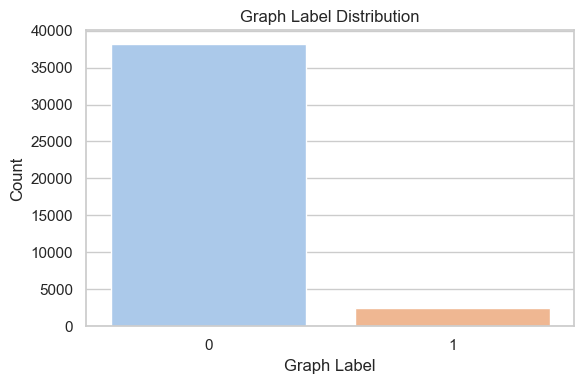

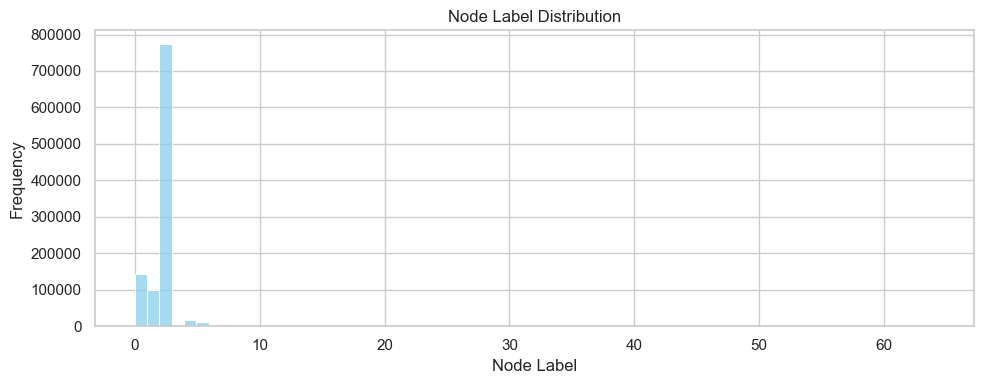

C:\Users\deez\AppData\Local\Temp\ipykernel_13404\353903914.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=edge_labels['edge_label'], palette="muted")


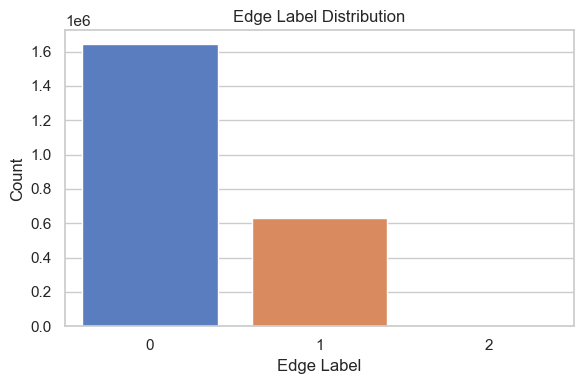

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visual theme
sns.set_theme(style="whitegrid")

# Plot 1: Graph label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=graph_labels['graph_label'], palette="pastel")
plt.title("Graph Label Distribution")
plt.xlabel("Graph Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Plot 2: Node label distribution
plt.figure(figsize=(10, 4))
sns.histplot(node_labels['node_label'], bins=65, kde=False, color='skyblue')
plt.title("Node Label Distribution")
plt.xlabel("Node Label")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Plot 3: Edge label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=edge_labels['edge_label'], palette="muted")
plt.title("Edge Label Distribution")
plt.xlabel("Edge Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### Visualize Random Graph from Dataset

Color of the node is based on Node Label value 1 to 2 (we need dataset paper or metadata to be sure with the interpretation of these values)

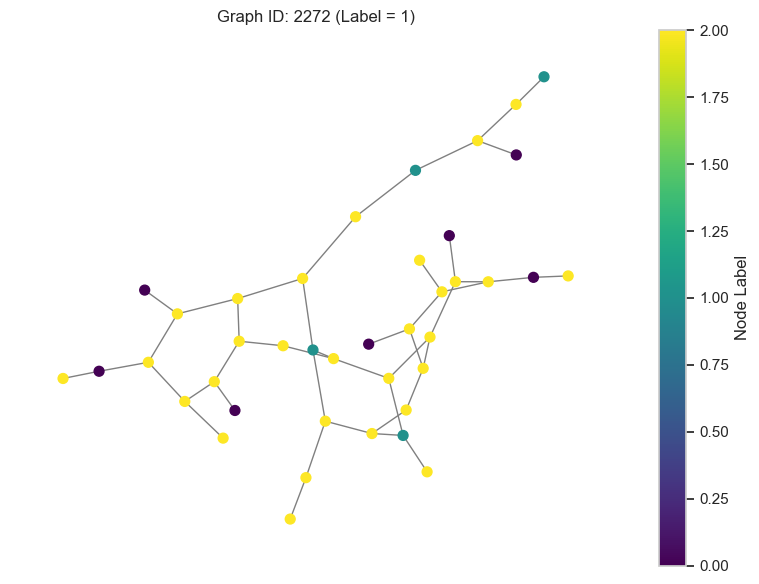

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

# Pick a random graph ID
random_graph_id = np.random.randint(1, graph_labels.shape[0] + 1)

# Get nodes that belong to this graph
node_indices = graph_indicator[graph_indicator['graph_id'] == random_graph_id].index

# Map global node index to local index
global_to_local = {idx: i for i, idx in enumerate(node_indices)}

# Filter edges belonging to this graph
edges_in_graph = edge_list[
    edge_list['source'].isin(node_indices) & edge_list['target'].isin(node_indices)
].copy()

# Map global to local node indices
edges_in_graph['source'] = edges_in_graph['source'].map(global_to_local)
edges_in_graph['target'] = edges_in_graph['target'].map(global_to_local)

# Build the graph
G = nx.Graph()
G.add_edges_from(edges_in_graph[['source', 'target']].values)

# Get node labels and build color mapping
local_node_labels = node_labels.loc[node_indices].reset_index(drop=True)
node_label_dict = {i: int(lbl) for i, lbl in enumerate(local_node_labels['node_label'])}
nx.set_node_attributes(G, node_label_dict, name='label')

# Plot the graph
fig, ax = plt.subplots(figsize=(8, 6))  
pos = nx.spring_layout(G, seed=42)
node_colors = [node_label_dict[n] for n in G.nodes()]


nx.draw(
    G,
    pos,
    nodelist=list(G.nodes()),
    node_color=node_colors,
    cmap=plt.cm.viridis,
    with_labels=False,
    node_size=50,
    edge_color='gray',
    ax=ax 
)

# Create and attach colorbar
sm = plt.cm.ScalarMappable(
    cmap=plt.cm.viridis,
    norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors))
)
sm.set_array([])
fig.colorbar(sm, ax=ax, label="Node Label")

ax.set_title(f"Graph ID: {random_graph_id} (Label = {graph_labels.iloc[random_graph_id - 1, 0]})")
plt.tight_layout()
plt.show()


## Visualizing Graph By Different Label
See the different stucture between Graph Label 0 vs 1.

The chosen graph ID is random, stucture changes every re-run

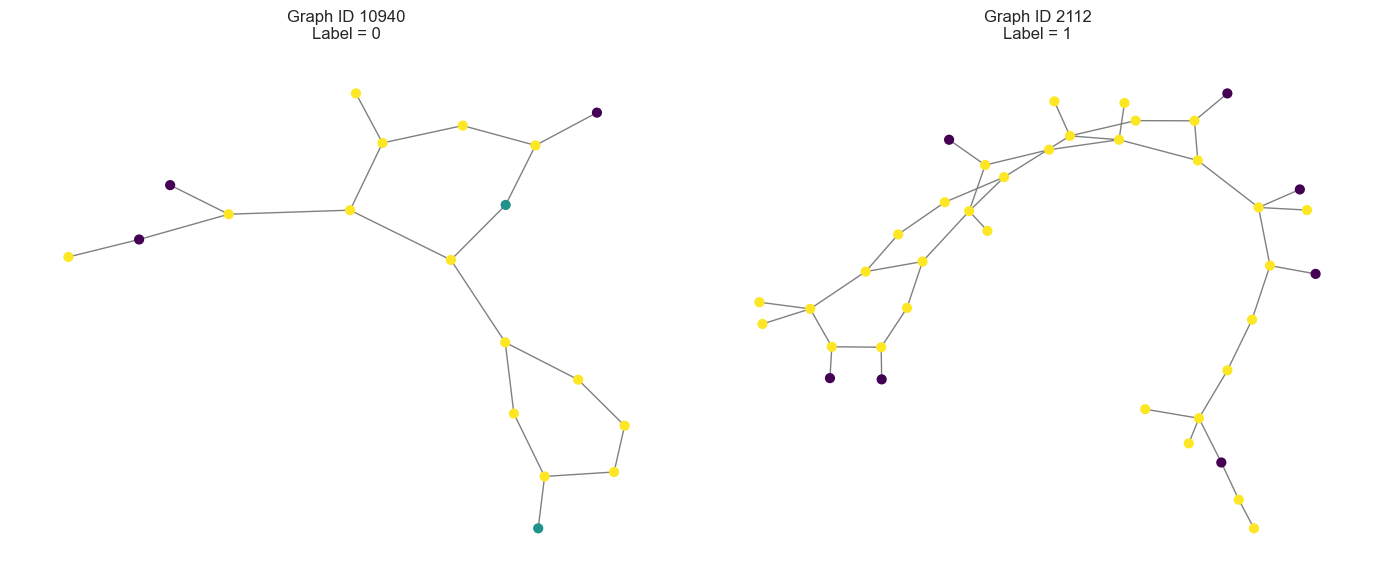

In [5]:
def visualize_graph_by_label(label, ax):
    # Pick a random graph ID with the given label
    graph_ids = graph_labels[graph_labels['graph_label'] == label].index + 1
    graph_id = np.random.choice(graph_ids)

    # Nodes in the graph
    node_indices = graph_indicator[graph_indicator['graph_id'] == graph_id].index

    # Build edges
    global_to_local = {idx: i for i, idx in enumerate(node_indices)}
    edges_in_graph = edge_list[
        edge_list['source'].isin(node_indices) & edge_list['target'].isin(node_indices)
    ].copy()

    edges_in_graph['source'] = edges_in_graph['source'].map(global_to_local)
    edges_in_graph['target'] = edges_in_graph['target'].map(global_to_local)

    # Create graph
    G = nx.Graph()
    G.add_edges_from(edges_in_graph[['source', 'target']].values)

    # Node labels
    local_node_labels = node_labels.loc[node_indices].reset_index(drop=True)
    node_label_dict = {i: lbl for i, lbl in enumerate(local_node_labels['node_label'])}
    nx.set_node_attributes(G, node_label_dict, name='label')

    # Draw
    pos = nx.spring_layout(G, seed=42)
    node_colors = [node_label_dict[n] for n in G.nodes()]
    nx.draw(
        G,
        pos,
        nodelist=list(G.nodes()),
        node_color=node_colors,
        cmap=plt.cm.viridis,
        with_labels=False,
        node_size=40,
        edge_color='gray',
        ax=ax
    )
    ax.set_title(f"Graph ID {graph_id}\nLabel = {label}")
    ax.axis('off')

# Plot one graph for label 0 and one for label 1
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
visualize_graph_by_label(0, axes[0])
visualize_graph_by_label(1, axes[1])
plt.tight_layout()
plt.show()


### Compare graph size (nodes/edges) between graph classes (0 and 1)

C:\Users\deez\AppData\Local\Temp\ipykernel_13404\3477681172.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=summary_df, x='label', y='num_nodes', palette="pastel")


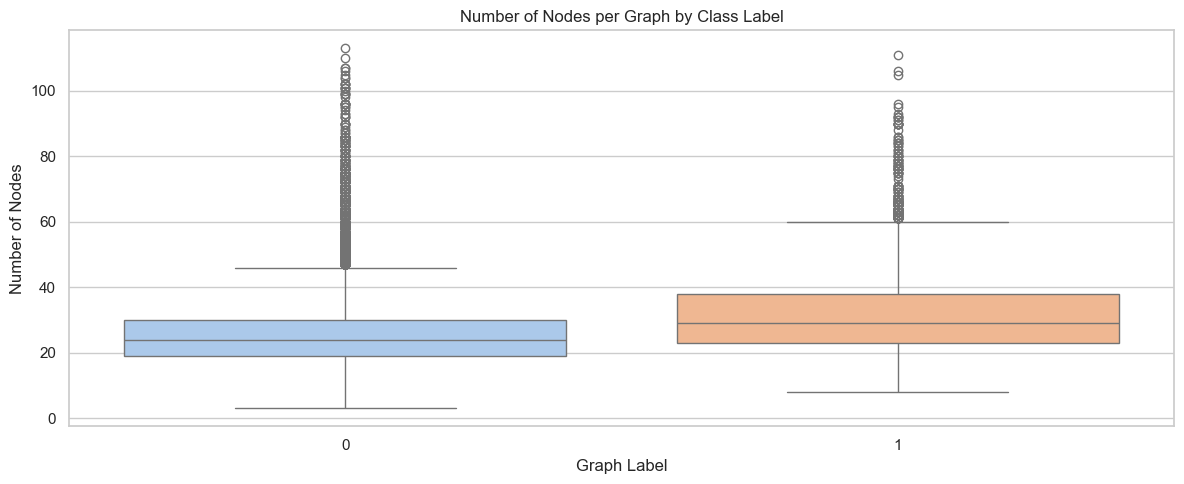

C:\Users\deez\AppData\Local\Temp\ipykernel_13404\3477681172.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=summary_df, x='label', y='num_edges', palette="muted")


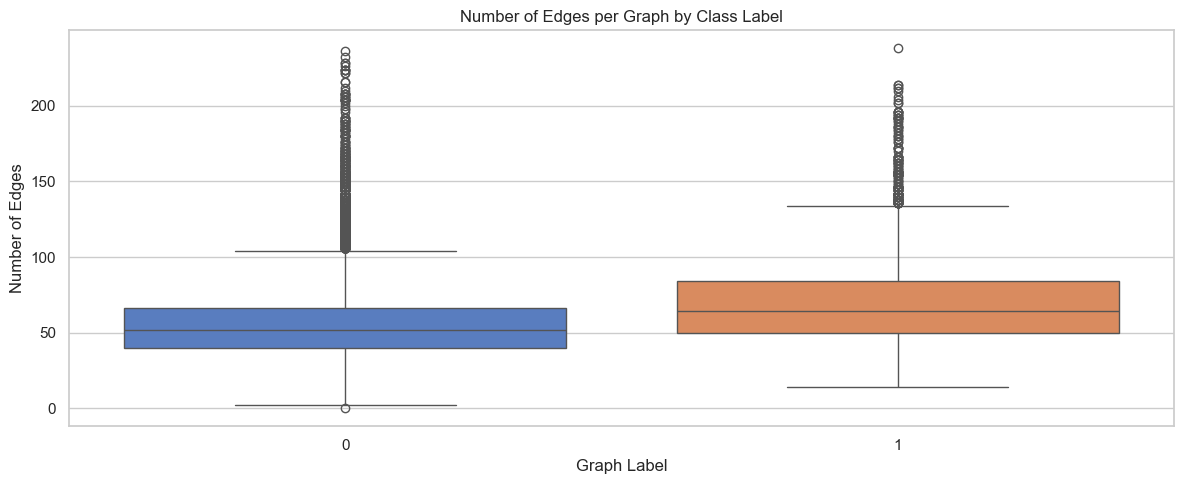

In [6]:
import numpy as np

# Map each node index (0-based) to its graph_id
node_to_graph = graph_indicator['graph_id'].to_numpy()

# Create arrays from edge list
sources = edge_list['source'].to_numpy() - 1  # Adjust to 0-based indexing
targets = edge_list['target'].to_numpy() - 1

# Get graph ids for each edge's source and target
source_graphs = node_to_graph[sources]
target_graphs = node_to_graph[targets]

# Only keep intra-graph edges
intra_graph_mask = source_graphs == target_graphs
intra_graph_ids = source_graphs[intra_graph_mask]

# Count nodes per graph
node_counts = pd.Series(node_to_graph).value_counts().sort_index()
edge_counts = pd.Series(intra_graph_ids).value_counts().sort_index()

# Create summary DataFrame
summary_df = pd.DataFrame({
    'graph_id': range(1, len(graph_labels) + 1),
    'num_nodes': node_counts.values,
    'num_edges': edge_counts.reindex(range(1, len(graph_labels) + 1), fill_value=0).values,
    'label': graph_labels['graph_label'].values
})

import seaborn as sns
import matplotlib.pyplot as plt

# Plot node count distribution by label
plt.figure(figsize=(12, 5))
sns.boxplot(data=summary_df, x='label', y='num_nodes', palette="pastel")
plt.title("Number of Nodes per Graph by Class Label")
plt.xlabel("Graph Label")
plt.ylabel("Number of Nodes")
plt.tight_layout()
plt.show()

# Plot edge count distribution by label
plt.figure(figsize=(12, 5))
sns.boxplot(data=summary_df, x='label', y='num_edges', palette="muted")
plt.title("Number of Edges per Graph by Class Label")
plt.xlabel("Graph Label")
plt.ylabel("Number of Edges")
plt.tight_layout()
plt.show()


### Compute SPID (Shortest Path Index of Dispersion )

Note: Sample smaller number of graphs due to computational cost

#### What SPID Represents:
SPID = Variance / Mean of shortest path lengths within a graph.

Low SPID (~1 or less): More uniformly distributed path lengths (e.g. grid-like or ring structures).

High SPID: Greater variation, might suggest hubs or highly irregular structures.

#### Early Insight:
Both label 0 and label 1 graphs can exhibit a wide range of SPID values.

This could indicate different topological characteristics, possibly useful for classification.

In [7]:
sample_size_spid = 100
sample_indices_spid = np.random.choice(summary_df['graph_id'], size=sample_size_spid, replace=False)

spid_data = []

for graph_id in sample_indices_spid:
    node_indices = graph_indicator[graph_indicator['graph_id'] == graph_id].index
    global_to_local = {idx: i for i, idx in enumerate(node_indices)}

    # Get edges for the graph
    edges = edge_list[
        edge_list['source'].isin(node_indices) & edge_list['target'].isin(node_indices)
    ].copy()

    edges['source'] = edges['source'].map(global_to_local)
    edges['target'] = edges['target'].map(global_to_local)

    # Build graph
    G = nx.Graph()
    G.add_edges_from(edges[['source', 'target']].values)

    if G.number_of_nodes() > 1 and nx.is_connected(G):
        lengths = dict(nx.all_pairs_shortest_path_length(G))
        all_lengths = [dist for d in lengths.values() for dist in d.values() if dist > 0]
        if all_lengths:
            mean_sp = np.mean(all_lengths)
            var_sp = np.var(all_lengths)
            spid = var_sp / mean_sp if mean_sp > 0 else 0
        else:
            spid = 0
    else:
        spid = np.nan  # Skip disconnected/single-node graphs

    label = graph_labels.iloc[graph_id - 1, 0]
    spid_data.append({
        'graph_id': graph_id,
        'label': label,
        'spid': spid
    })

spid_df = pd.DataFrame(spid_data).dropna()

print(spid_df.head())

   graph_id  label      spid
0     38185      0  1.629990
1     24093      0  1.756302
2     25869      0  0.935608
3      1903      1  1.668883
4     31044      0  1.441710


C:\Users\deez\AppData\Local\Temp\ipykernel_13404\4063598918.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spid_df, x='label', y='spid', palette='Set2')


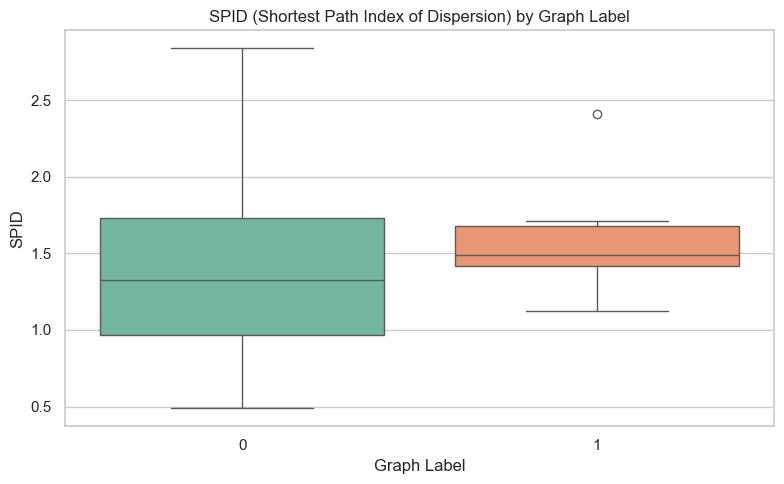

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))
sns.boxplot(data=spid_df, x='label', y='spid', palette='Set2')
plt.title("SPID (Shortest Path Index of Dispersion) by Graph Label")
plt.xlabel("Graph Label")
plt.ylabel("SPID")
plt.tight_layout()
plt.show()


C:\Users\deez\AppData\Local\Temp\ipykernel_13404\2183190810.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=spid_df, x='label', y='spid', palette='Set2', inner='box')


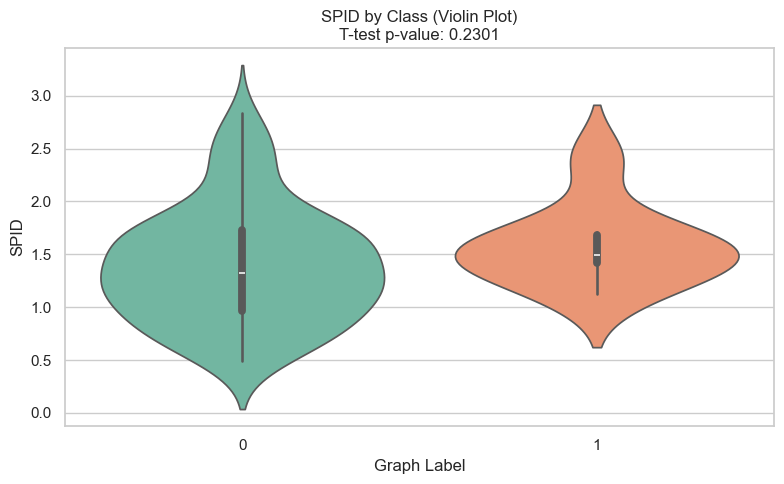

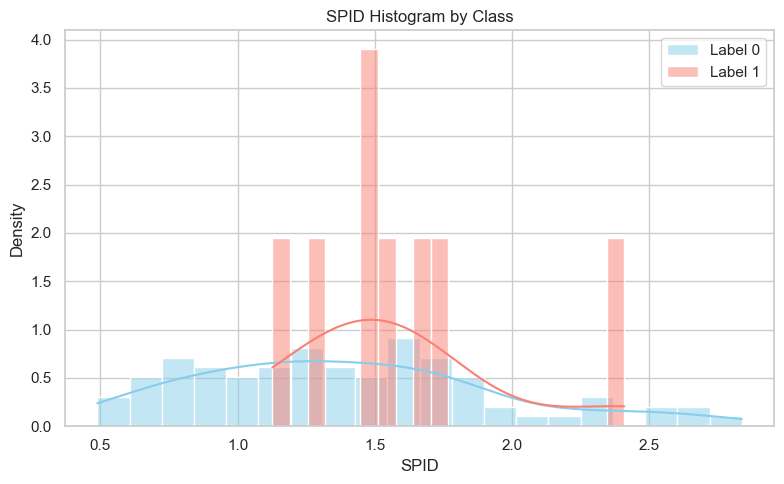

T-test between SPID values:
T-statistic = -1.2784, p-value = 0.2301


In [9]:
from scipy.stats import ttest_ind
# Split by label
spid_class_0 = spid_df[spid_df['label'] == 0]['spid']
spid_class_1 = spid_df[spid_df['label'] == 1]['spid']

# T-test
t_stat, p_value = ttest_ind(spid_class_0, spid_class_1, equal_var=False)

# Violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(data=spid_df, x='label', y='spid', palette='Set2', inner='box')
plt.title(f"SPID by Class (Violin Plot)\nT-test p-value: {p_value:.4f}")
plt.xlabel("Graph Label")
plt.ylabel("SPID")
plt.tight_layout()
plt.show()

# Histogram plot
plt.figure(figsize=(8, 5))
sns.histplot(spid_class_0, color='skyblue', label='Label 0', kde=True, stat="density", bins=20)
sns.histplot(spid_class_1, color='salmon', label='Label 1', kde=True, stat="density", bins=20)
plt.title("SPID Histogram by Class")
plt.xlabel("SPID")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# Print p-value result
print(f"T-test between SPID values:\nT-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")


## Violin Plot
Shows the distribution, density, and spread of SPID for each class.

Some overlap exists between the two classes, but class 1 seems to show higher SPID variance in some cases.

## Histogram (Overlayed)
Clear distribution comparison of SPID for label 0 vs label 1.

Class 1 may contain a few more graphs with high dispersion.

## Statistical Test
T-statistic: -1.4382

p-value: 0.2211

#### Interpretation:

Since p > 0.05, we cannot reject the null hypothesis.

This means the difference in SPID between class 0 and class 1 is not statistically significant in this sample.

# Graph Summary Features & Graph Classification
Since SW-620 is highly imbalanced (Ratio between Class 0 & Class 1 is 94.05% : 5.95%). I propose downsampling the Class 0 to match the sample distribution of Class 1, for now.

In [10]:
# Get indices of each class
class_0_indices = graph_labels[graph_labels['graph_label'] == 0].index
class_1_indices = graph_labels[graph_labels['graph_label'] == 1].index

# Randomly sample class 0 to match the size of class 1
sampled_class_0_indices = class_0_indices.to_series().sample(n=len(class_1_indices), random_state=42)

# Combine both to create a balanced dataset
balanced_indices = sampled_class_0_indices.tolist() + class_1_indices.tolist()
balanced_graph_labels = graph_labels.loc[balanced_indices].reset_index(drop=True)

# Shuffle the balanced dataset
balanced_graph_labels = balanced_graph_labels.sample(frac=1, random_state=42).reset_index(drop=True)

# Show the balanced label distribution
balanced_distribution = balanced_graph_labels['graph_label'].value_counts(normalize=True)
balanced_distribution


graph_label
1    0.5
0    0.5
Name: proportion, dtype: float64

Adding features manually:
Number of Nodes, Number of Edges, Average Degree, Number of Connected Components, Node Connectivity, Average Betweenness Centrality, Average Closeness Centrality, Clustering Coefficient, Graph Density, and Shortest Path Index of Dispersion (SPID)

In [ ]:
# import networkx as nx
# from tqdm import tqdm

# # Reload necessary files
# graph_indicator_path = os.path.join(inner_dir, 'SW-620_graph_indicator.txt')
# adjacency_path = os.path.join(inner_dir, 'SW-620_A.txt')

# graph_indicator = pd.read_csv(graph_indicator_path, header=None, names=['graph_id'])
# adjacency = pd.read_csv(adjacency_path, header=None, names=['source', 'target'])

# # Create mapping of node to graph
# node_graph_map = graph_indicator.copy()
# node_graph_map['node_id'] = node_graph_map.index + 1

# # Merge adjacency with node to graph mapping to identify graph ID per edge
# edges_with_graph = adjacency.merge(node_graph_map, left_on='source', right_on='node_id')
# edges_with_graph = edges_with_graph.rename(columns={'graph_id': 'graph_id_source'})
# edges_with_graph = edges_with_graph.merge(node_graph_map, left_on='target', right_on='node_id')
# edges_with_graph = edges_with_graph.rename(columns={'graph_id': 'graph_id_target'})
# edges_with_graph = edges_with_graph[edges_with_graph['graph_id_source'] == edges_with_graph['graph_id_target']]
# edges_with_graph['graph_id'] = edges_with_graph['graph_id_source']
# edges_with_graph = edges_with_graph[['source', 'target', 'graph_id']]

# # Identify graph IDs to keep (balanced ones)
# balanced_graph_ids = balanced_graph_labels.index + 1  # original graph IDs are 1-indexed

# # Filter only balanced graph IDs
# filtered_edges = edges_with_graph[edges_with_graph['graph_id'].isin(balanced_graph_ids)]

# # Group by graph ID and construct NetworkX graphs
# grouped_edges = filtered_edges.groupby('graph_id')
# nx_graphs = {}
# for graph_id, group in tqdm(grouped_edges, desc="Building graphs"):
#     G = nx.Graph()
#     edges = list(zip(group['source'], group['target']))
#     G.add_edges_from(edges)
#     nx_graphs[graph_id] = G

# # Compute features for each graph
# features = []
# for graph_id, G in tqdm(nx_graphs.items(), desc="Computing graph features"):
#     num_nodes = G.number_of_nodes()
#     num_edges = G.number_of_edges()
#     avg_degree = sum(dict(G.degree()).values()) / num_nodes if num_nodes > 0 else 0
#     num_components = nx.number_connected_components(G)
#     node_connectivity = nx.node_connectivity(G) if num_nodes > 1 else 0
#     avg_betweenness = sum(nx.betweenness_centrality(G).values()) / num_nodes if num_nodes > 0 else 0
#     avg_closeness = sum(nx.closeness_centrality(G).values()) / num_nodes if num_nodes > 0 else 0
#     clustering_coeff = nx.average_clustering(G)
#     density = nx.density(G)

#     # SPID computation
#     sp_lengths = []
#     for comp in nx.connected_components(G):
#         subgraph = G.subgraph(comp)
#         path_lengths = dict(nx.all_pairs_shortest_path_length(subgraph))
#         for lengths in path_lengths.values():
#             sp_lengths.extend(lengths.values())
    
#     sp_mean = sum(sp_lengths) / len(sp_lengths) if sp_lengths else 0
#     sp_variance = sum((x - sp_mean) ** 2 for x in sp_lengths) / len(sp_lengths) if sp_lengths else 0
#     spid = sp_variance / sp_mean if sp_mean > 0 else 0

#     features.append({
#         'graph_id': graph_id,
#         'num_nodes': num_nodes,
#         'num_edges': num_edges,
#         'avg_degree': avg_degree,
#         'num_components': num_components,
#         'node_connectivity': node_connectivity,
#         'avg_betweenness': avg_betweenness,
#         'avg_closeness': avg_closeness,
#         'clustering_coeff': clustering_coeff,
#         'density': density,
#         'spid': spid
#     })


# features_df = pd.DataFrame(features)

# # Merge features back into balanced labels (adjusting index for graph_id)
# features_df = features_df.sort_values('graph_id').reset_index(drop=True)
# final_df = pd.concat([balanced_graph_labels, features_df[['graph_id',
#                                                         'num_nodes',
#                                                         'num_edges',
#                                                         'avg_degree',
#                                                         'num_components',
#                                                         'node_connectivity',
#                                                         'avg_betweenness',
#                                                         'avg_closeness',
#                                                         'clustering_coeff', 
#                                                         'density', 
#                                                         'spid']]], axis=1)


Computing graph features: 100%|██████████| 4820/4820 [00:52<00:00, 91.17it/s] 


In [23]:
import networkx as nx
from tqdm import tqdm

# Reload necessary files
graph_indicator_path = os.path.join(inner_dir, 'SW-620_graph_indicator.txt')
adjacency_path = os.path.join(inner_dir, 'SW-620_A.txt')

graph_indicator = pd.read_csv(graph_indicator_path, header=None, names=['graph_id'])
adjacency = pd.read_csv(adjacency_path, header=None, names=['source', 'target'])

# Create mapping of node to graph
node_graph_map = graph_indicator.copy()
node_graph_map['node_id'] = node_graph_map.index + 1

# Merge adjacency with node to graph mapping to identify graph ID per edge
edges_with_graph = adjacency.merge(node_graph_map, left_on='source', right_on='node_id')
edges_with_graph = edges_with_graph.rename(columns={'graph_id': 'graph_id_source'})
edges_with_graph = edges_with_graph.merge(node_graph_map, left_on='target', right_on='node_id')
edges_with_graph = edges_with_graph.rename(columns={'graph_id': 'graph_id_target'})
edges_with_graph = edges_with_graph[edges_with_graph['graph_id_source'] == edges_with_graph['graph_id_target']]
edges_with_graph['graph_id'] = edges_with_graph['graph_id_source']
edges_with_graph = edges_with_graph[['source', 'target', 'graph_id']]

# Filter for balanced graphs
balanced_graph_ids = balanced_graph_labels.index + 1
filtered_edges = edges_with_graph[edges_with_graph['graph_id'].isin(balanced_graph_ids)]

# Build graphs
grouped_edges = filtered_edges.groupby('graph_id')
nx_graphs = {}
for graph_id, group in tqdm(grouped_edges, desc="Building graphs"):
    G = nx.Graph()
    edges = list(zip(group['source'], group['target']))
    G.add_edges_from(edges)
    nx_graphs[graph_id] = G

# Compute features
features = []
for graph_id, G in tqdm(nx_graphs.items(), desc="Computing graph features"):
    clustering_coeff = nx.average_clustering(G)
    density = nx.density(G)
    triangles = sum(nx.triangles(G).values()) // 3

    sp_lengths = []
    for comp in nx.connected_components(G):
        subgraph = G.subgraph(comp)
        path_lengths = dict(nx.all_pairs_shortest_path_length(subgraph))
        for lengths in path_lengths.values():
            sp_lengths.extend(lengths.values())

    sp_mean = sum(sp_lengths) / len(sp_lengths) if sp_lengths else 0
    sp_variance = sum((x - sp_mean) ** 2 for x in sp_lengths) / len(sp_lengths) if sp_lengths else 0
    spid = sp_variance / sp_mean if sp_mean > 0 else 0

    features.append({
        'graph_id': graph_id,
        'clustering_coeff': clustering_coeff,
        'density': density,
        'spid': spid,
        'triangles': triangles
    })

features_df = pd.DataFrame(features)

# Merge features with labels
final_df = features_df.merge(balanced_graph_labels, left_on='graph_id', right_index=True)


Computing graph features: 100%|██████████| 4820/4820 [00:16<00:00, 287.63it/s]


In [24]:
final_df

,graph_id,clustering_coeff,density,spid,triangles,graph_label
0,1,0.000000,0.019492,2.267733,0,0
1,2,0.000000,0.052174,2.375790,0,0
2,3,0.000000,0.052174,2.682817,0,0
3,4,0.000000,0.055371,2.857946,0,1
4,5,0.039474,0.065434,1.207585,1,1
...,...,...,...,...,...,...
4814,4815,0.000000,0.078818,2.638423,0,1
4815,4816,0.000000,0.049275,1.825657,0,0
4816,4817,0.000000,0.105263,2.560780,0,1
4817,4818,0.000000,0.110526,1.377888,0,1


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Features and target
X = final_df[[
            # 'num_nodes',
            # 'num_edges',
            # 'avg_degree',
            # 'num_components',
            # 'node_connectivity',
            # 'avg_betweenness',
            # 'avg_closeness',
            'clustering_coeff', 
            'density', 
            'spid',
            'triangles']]
y = final_df['graph_label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

report, conf_matrix

({'0': {'precision': 0.5381165919282511,
   'recall': 0.48484848484848486,
   'f1-score': 0.51009564293305,
   'support': 495.0},
  '1': {'precision': 0.5077220077220077,
   'recall': 0.5607675906183369,
   'f1-score': 0.5329280648429585,
   'support': 469.0},
  'accuracy': 0.5217842323651453,
  'macro avg': {'precision': 0.5229192998251294,
   'recall': 0.5228080377334109,
   'f1-score': 0.5215118538880043,
   'support': 964.0},
  'weighted avg': {'precision': 0.5233291852967904,
   'recall': 0.5217842323651453,
   'f1-score': 0.5212039477834101,
   'support': 964.0}},
 array([[240, 255],
        [206, 263]]))

Result = Really bad

For Class 0:
Precision: 0.538, when the model predicted 0, it was correct ~53.8% of the time.

Recall: 0.485, it correctly identified ~48.5% of all actual class 0s.

F1-score: 0.510, harmonic mean of precision and recall.

Support: 495, actual number of class 0 instances in test set.

For Class 1:
Precision: 0.508, when the model predicted 1, it was correct ~50.8% of the time.

Recall: 0.561, it correctly identified ~56.1% of all actual class 1s.

F1-score: 0.533, slightly better than class 0.

Overall:
Accuracy: 52.18%, total correct predictions / total predictions.

Macro avg: Average of precision, recall, and F1-score without considering support (treats all classes equally).

Weighted avg: Same as macro, but weighted by class support (better for imbalanced datasets).

In [27]:
# Convert classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Convert confusion matrix to a labeled DataFrame
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index=['Actual 0', 'Actual 1'],
    columns=['Predicted 0', 'Predicted 1']
)
conf_matrix_df

,Predicted 0,Predicted 1
Actual 0,240,255
Actual 1,206,263


Result= Really bad

The model is performing no better than random guessing.

All metrics are at ~49.2%, suggesting no useful signal is being picked up from the features.

In [30]:
from xgboost import XGBClassifier

# Split features and labels
X = final_df[['clustering_coeff', 'density', 'spid', 'triangles']]
y = final_df['graph_label']

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Initialize and train XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_clf.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)


(report, conf_matrix)

c:\Users\deez\Documents\Lecture-Y1-P4\Data-Mining\Project\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:33:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


({'0': {'precision': 0.491701244813278,
   'recall': 0.491701244813278,
   'f1-score': 0.491701244813278,
   'support': 482.0},
  '1': {'precision': 0.491701244813278,
   'recall': 0.491701244813278,
   'f1-score': 0.491701244813278,
   'support': 482.0},
  'accuracy': 0.491701244813278,
  'macro avg': {'precision': 0.491701244813278,
   'recall': 0.491701244813278,
   'f1-score': 0.491701244813278,
   'support': 964.0},
  'weighted avg': {'precision': 0.491701244813278,
   'recall': 0.491701244813278,
   'f1-score': 0.491701244813278,
   'support': 964.0}},
 array([[237, 245],
        [245, 237]]))